# CAO Points Analysis
Jody Bradley - G00387878
***
## Introduction
We have been tasked with creating a Jupyter notebook which contains the following:

* A clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame.
* A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.
* Appropriate plots and other visualisations to enhance your notebook for viewers.

## Web Scraping
"Web Scraping" allows us to pull a large amount of data from a website in a quick and efficient manner. The purpose of this Jupyter notebook is to provide a clear and concise overview of how to load CAO points information from the CAO website into a pandas data frame.

## Importing required packages
We will need to import a number of packages to help us with this task.

#### Regular Expression
A Regular Expression is a sequence of characters that forms a search pattern. It can be used to check if a string contains a specific search patter [1]

#### Requests
The requests module allows us to send a HTTP request using Python. It returns a Response Object with all the response data (content, encoding, status, etc.) [2]

#### DateTime
This module allows us to work with dates as data objects [3].

#### Pandas
Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring and manipulating data [4].

#### Urllib
The Urllib package is used for fetching and handling URLs [5]. We'll be using urllib.request for downloading.

#### Seaborn 
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### numpy
NumPy is a Python library used for working with arrays.

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# For downloading.
import urllib.request as urlrq

# For plotting.
import matplotlib.pyplot as plt

# For plotting style.
import seaborn as sns

# Import numpy
import numpy as np


### Get the current date and time

We'll be using the datetime function to give our saved files a unique name when scraping the data from the CAO website. First, let's get the current date and time and format it as a string. 

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

## 2021 points
---

In this section we will download the 2021 data from the CAO website. Since the initial data scrape carried out during the lectures for this module, the CAO website was updated to provide 2021 points in xlsx format. Therefore, I am using this approach as I found it easier to work with.

In [3]:
# Get the 2021 CAO points [6]:
url2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

<br>

#### Save Original File

***

In [4]:
# Create a file path for the original data.
pathxlsx = 'data/cao2021_' + nowstr + '.xlsx'

In [5]:
urlrq.urlretrieve(url2021, pathxlsx)

('data/cao2021_20220107_161636.xlsx',
 <http.client.HTTPMessage at 0x1f4aa597b20>)

<br>

#### Load Spreadsheet using pandas

***

In [6]:
# Download and parse the excel spreadsheet.
df2021 = pd.read_excel(url2021, skiprows=11)

In [7]:
# We only want the level 8 courses
df2021 = df2021[df2021['Course Level'] == 8]

In [8]:
df2021

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
29,Information and Communication Technologies (ICTs),Software Design for Virtual Reality and Gaming,AL801,300,NaN,NaN,NaN,300,NaN,359,8,Athlone Institute of Technology,NaN,NaN,NaN
30,Information and Communication Technologies (ICTs),Software Design in Artificial Intelligence for...,AL802,313,NaN,NaN,NaN,313,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
31,Information and Communication Technologies (ICTs),Software Design for Mobile Apps and Connected ...,AL803,350,NaN,NaN,NaN,350,NaN,398,8,Athlone Institute of Technology,NaN,NaN,NaN
32,Information and Communication Technologies (ICTs),Computer Engineering for Network Infrastructure,AL805,321,NaN,NaN,NaN,321,NaN,381,8,Athlone Institute of Technology,NaN,NaN,NaN
33,Architecture and construction,Quantity Surveying,AL810,328,NaN,NaN,NaN,328,NaN,377,8,Athlone Institute of Technology,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270,NaN,NaN,NaN,270,NaN,392,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262,NaN,NaN,NaN,262,NaN,304,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230,NaN,230,NaN,230,NaN,361,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266,NaN,NaN,NaN,266,NaN,366,8,Waterford Institute of Technology,NaN,NaN,NaN


In [9]:
# And we only want the 1st, 2nd and EOS points
df2021 = df2021.loc[:, ['Course Code', 'Course Title', 'HEI', 'R1 Points', 'R2 Points ', 'EOS Points']]


In [10]:
df2021

,Course Code,Course Title,HEI,R1 Points,R2 Points,EOS Points
29,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300
30,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313
31,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350
32,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321
33,AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328
...,...,...,...,...,...,...
1446,WD211,Creative Computing,Waterford Institute of Technology,270,NaN,270
1447,WD212,Recreation and Sport Management,Waterford Institute of Technology,262,NaN,262
1448,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology,230,230,230
1449,WD231,Early Childhood Care and Education,Waterford Institute of Technology,266,NaN,266


In [11]:
# Create a file path for the pandas data.
path2021 = 'data/cao2021_' + nowstr + '.csv'

In [12]:
# Save pandas data frame to disk.
df2021.to_csv(path2021)

<br>

## 2020 Points

***
As the 2020 points are also hosted on the CAO website in xlsx format, we can use the same methodology as for the 2021 points above.

In [13]:
# Get the 2020 CAO points [7]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

<br>

#### Save Original File

***

In [14]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [15]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20220107_161636.xlsx',
 <http.client.HTTPMessage at 0x1f4b00dfb80>)

<br>

#### Load Spreadsheet using pandas

***

In [16]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [17]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# We only want the course code, title, HEI, 1st, 2nd and EOS points
df2020 = df2020.loc[:, ['COURSE CODE2', 'COURSE TITLE', 'HEI', 'R1 POINTS', 'R2 POINTS', 'EOS']]

In [19]:
df2020

,COURSE CODE2,COURSE TITLE,HEI,R1 POINTS,R2 POINTS,EOS
0,AC120,International Business,American College,209,NaN,209
1,AC137,Liberal Arts,American College,252,NaN,252
2,AD101,"First Year Art & Design (Common Entry,portfolio)",National College of Art and Design,#+matric,NaN,#+matric
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design,#+matric,NaN,#+matric
4,AD103,Textile & Surface Design and Jewellery & Objec...,National College of Art and Design,#+matric,NaN,#+matric
...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,Waterford Institute of Technology,188,NaN,188
1460,WD210,Software Systems Development,Waterford Institute of Technology,279,NaN,279
1461,WD211,Creative Computing,Waterford Institute of Technology,271,NaN,271
1462,WD212,Recreation and Sport Management,Waterford Institute of Technology,270,NaN,270


In [20]:
# Create a file path for the pandas data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [21]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

## 2019 Points

***
The 2019 points are hosted on the CAO website in PDF format. While I could easily scrape the 2021/2020 information from the xlsx format on the website, a more manual approach was required to obtain the 2019 points, as follows:

1. Save the contents of the PDF file [at http://www2.cao.ie/points/lvl8_19.pdf] by right clicking on it, clicking "Save Link As", save into your project data file and save the file using the datetime stamp format that we have used previously. 
2. Open the file Microsoft Word (right click on the file and select "Open With" - Word).
2. Save the Word document as a doc.x file with the same name as the PDF file. 
3. Save a new copy of the document for editing, with "_edited" at the end of the file name.
4. Manuall tidy up the file by deleting the header and footers.
5. Select all of the file (ctrl + a) and paste into a Notepad ++ file. 
6. Manually tidy up the data file - get rid of any apostrophes, blank lines etc. Remove HEI headings and paste onto each course line. Replace tab characters with commas.
8. Save the Notepad ++ with the same name as the doc.x file but as a csv file. 


In [22]:
# Get 2019 CAO points [8]:
df2019 = pd.read_excel('data/cao2019_20211230_edited.xlsx')

In [23]:
# We only want the course code, title, HEI and 1st round points (as no data for 2nd round / EOS available)
df2019 = df2019.loc[:, ['code', 'course', 'HEI', 'points']]

In [24]:
df2019

,code,course,HEI,points
0,AC120,International Business,American College,234
1,AC137,Liberal Arts,American College,252
2,AD101,First Year Art & Design (Common Entry),National College of Art and Design,NaN
3,AD102,Graphic Design and Moving Image Design,National College of Art and Design,NaN
4,AD103,Textile & Surface Design and Jewellery & Objects,National College of Art and Design,NaN
...,...,...,...,...
925,WD200,Arts (options),Waterford Institute of Technology,221
926,WD210,Software Systems Development,Waterford Institute of Technology,271
927,WD211,Creative Computing,Waterford Institute of Technology,275
928,WD212,Recreation and Sport Management,Waterford Institute of Technology,274


<br>

## concat and join

***
We want to put together a list of all of the course codes, course titles, and HEIs. To do this, firstly we want to just take these from the 2021 dataframe. 

In [25]:
courses2021 = df2021[['Course Code','Course Title','HEI']]
courses2021.columns = ['code', 'course', 'HEI']
courses2021

,code,course,HEI
29,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
30,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
31,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
32,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
33,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
1446,WD211,Creative Computing,Waterford Institute of Technology
1447,WD212,Recreation and Sport Management,Waterford Institute of Technology
1448,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1449,WD231,Early Childhood Care and Education,Waterford Institute of Technology


We want to do the same thing for the 2020 points, and we also want to rename the columns so that they are the same as the 2021 dataframe.

In [26]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE', 'HEI']]
courses2020.columns = ['code', 'course', 'HEI']
courses2020

,code,course,HEI
0,AC120,International Business,American College
1,AC137,Liberal Arts,American College
2,AD101,"First Year Art & Design (Common Entry,portfolio)",National College of Art and Design
3,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objec...,National College of Art and Design
...,...,...,...
1459,WD208,Manufacturing Engineering,Waterford Institute of Technology
1460,WD210,Software Systems Development,Waterford Institute of Technology
1461,WD211,Creative Computing,Waterford Institute of Technology
1462,WD212,Recreation and Sport Management,Waterford Institute of Technology


And the same thing again for 2019

In [27]:
courses2019 = df2019[['code', 'course', 'HEI']]
#courses2019.columns = ['code', 'course', 'HEI']
courses2019.sort_values('code')

,code,course,HEI
0,AC120,International Business,American College
1,AC137,Liberal Arts,American College
2,AD101,First Year Art & Design (Common Entry),National College of Art and Design
3,AD102,Graphic Design and Moving Image Design,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objects,National College of Art and Design
...,...,...,...
925,WD200,Arts (options),Waterford Institute of Technology
926,WD210,Software Systems Development,Waterford Institute of Technology
927,WD211,Creative Computing,Waterford Institute of Technology
928,WD212,Recreation and Sport Management,Waterford Institute of Technology


Now that we have done this for each of the three years, next we want to concatanate them.

In [28]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,course,HEI
0,AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology
1,AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology
2,AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology
3,AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology
4,AL810,Quantity Surveying,Athlone Institute of Technology
...,...,...,...
3423,WD200,Arts (options),Waterford Institute of Technology
3424,WD210,Software Systems Development,Waterford Institute of Technology
3425,WD211,Creative Computing,Waterford Institute of Technology
3426,WD212,Recreation and Sport Management,Waterford Institute of Technology


If we sort the dataset by "code", we can see that there are a number of duplicates:


In [29]:
allcourses.sort_values('code')

,code,course,HEI
1034,AC120,International Business,American College
175,AC120,International Business,American College
2498,AC120,International Business,American College
176,AC137,Liberal Arts,American College
1035,AC137,Liberal Arts,American College
...,...,...,...
3427,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
2497,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1031,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1032,WD231,Early Childhood Care and Education,Waterford Institute of Technology


We can see in the dataframe above for example, that there are three of "AC120". Next we want to remove those duplicates:

In [30]:
# Returns a copy of the data frame with duplicates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

Let's take a look at the dataframe again to make sure the duplicates are gone. 

In [31]:
allcourses.sort_values('code')

,code,course,HEI
175,AC120,International Business,American College
176,AC137,Liberal Arts,American College
312,AD101,"First Year Art and Design (Common Entry,portfo...",National College of Art and Design
313,AD102,Graphic Design and Moving Image Design (portfo...,National College of Art and Design
314,AD103,Textile and Surface Design and Jewellery and O...,National College of Art and Design
...,...,...,...
1029,WD211,Creative Computing,Waterford Institute of Technology
1030,WD212,Recreation and Sport Management,Waterford Institute of Technology
1031,WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology
1032,WD231,Early Childhood Care and Education,Waterford Institute of Technology


Now that we have a list of all courses, we need to join the data frames. 

<br>

## Join to the points

***
Now we need to get the CAO points into one dataframe. 

In [32]:
# Set the index to the code column.
df2021.set_index('Course Code', inplace=True)
df2021

,Course Title,HEI,R1 Points,R2 Points,EOS Points
Course Code,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328
...,...,...,...,...,...
WD211,Creative Computing,Waterford Institute of Technology,270,NaN,270
WD212,Recreation and Sport Management,Waterford Institute of Technology,262,NaN,262
WD230,Mechanical and Manufacturing Engineering,Waterford Institute of Technology,230,230,230


In [33]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [34]:
allcourses = allcourses.join(df2021[['R1 Points', 'R2 Points ', 'EOS Points']])
allcourses

,course,HEI,R1 Points,R2 Points,EOS Points
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328
...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN


In [35]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS', 'R2 POINTS', 'EOS']]
df2020_r1.columns = ['code', 'R1 Points 2020', 'R2 Points 2020', 'EOS Points 2020']
df2020_r1

,code,R1 Points 2020,R2 Points 2020,EOS Points 2020
0,AC120,209,NaN,209
1,AC137,252,NaN,252
2,AD101,#+matric,NaN,#+matric
3,AD102,#+matric,NaN,#+matric
4,AD103,#+matric,NaN,#+matric
...,...,...,...,...
1459,WD208,188,NaN,188
1460,WD210,279,NaN,279
1461,WD211,271,NaN,271
1462,WD212,270,NaN,270


In [36]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,R1 Points 2020,R2 Points 2020,EOS Points 2020
code,,,
AC120,209,NaN,209
AC137,252,NaN,252
AD101,#+matric,NaN,#+matric
AD102,#+matric,NaN,#+matric
AD103,#+matric,NaN,#+matric
...,...,...,...
WD208,188,NaN,188
WD210,279,NaN,279
WD211,271,NaN,271


In [37]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,course,HEI,R1 Points,R2 Points,EOS Points,R1 Points 2020,R2 Points 2020,EOS Points 2020
code,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300,303,NaN,303
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313,332,NaN,332
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350,337,NaN,337
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321,333,NaN,333
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328,319,NaN,326
...,...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,NaN,NaN
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,NaN,NaN
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df2019_r1 = df2019[['code', 'points']]
df2019_r1.columns = ['code', 'R1 Points 2019']
df2019_r1

,code,R1 Points 2019
0,AC120,234
1,AC137,252
2,AD101,NaN
3,AD102,NaN
4,AD103,NaN
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [39]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,R1 Points 2019
code,
AC120,234
AC137,252
AD101,NaN
AD102,NaN
AD103,NaN
...,...
WD200,221
WD210,271
WD211,275


In [40]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,course,HEI,R1 Points,R2 Points,EOS Points,R1 Points 2020,R2 Points 2020,EOS Points 2020,R1 Points 2019
code,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300,303,NaN,303,304
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313,332,NaN,332,301
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350,337,NaN,337,309
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321,333,NaN,333,329
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328,319,NaN,326,307
...,...,...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,NaN,NaN,218
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,NaN,NaN,218
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,NaN,NaN,264


In [41]:
# Replace NA with 0
allcourses.fillna(0)

,course,HEI,R1 Points,R2 Points,EOS Points,R1 Points 2020,R2 Points 2020,EOS Points 2020,R1 Points 2019
code,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,0,300,303,0,303,304
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,0,313,332,0,332,301
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,0,350,337,0,337,309
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,0,321,333,0,333,329
AL810,Quantity Surveying,Athlone Institute of Technology,328,0,328,319,0,326,307
...,...,...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,0,0,0,0,0,0,218
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,0,0,0,0,0,0,218
TL803,Music Technology,"Institute of Technology, Tralee",0,0,0,0,0,0,264


In [42]:
allcourses = allcourses.rename(columns={'R1 Points': 'R1 Points 2021', 'R2 Points ': 'R2 Points 2021', 'EOS Points': 'EOS Points 2021'})

In [43]:
# Remove # and * symbols from df.
# Code adapted from StackOverflow [9], [10]:

cols_to_check = ['R1 Points 2021', 'R2 Points 2021', 'R1 Points 2020', 'R2 Points 2020', 'R1 Points 2019']
allcourses[cols_to_check] = allcourses[cols_to_check].replace('[A-Z.#*+a-z]', '', regex = True)

In [44]:
allcourses

,course,HEI,R1 Points 2021,R2 Points 2021,EOS Points 2021,R1 Points 2020,R2 Points 2020,EOS Points 2020,R1 Points 2019
code,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300,NaN,300,303,NaN,303,304
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313,NaN,313,332,NaN,332,301
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350,NaN,350,337,NaN,337,309
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321,NaN,321,333,NaN,333,329
AL810,Quantity Surveying,Athlone Institute of Technology,328,NaN,328,319,NaN,326,307
...,...,...,...,...,...,...,...,...,...
TA328,Computing with Language (French/German/Spanish),Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,NaN,NaN,218
TA329,Computing with Data Analytics,Technological University Dublin Tallaght Campus,NaN,NaN,NaN,NaN,NaN,NaN,218
TL803,Music Technology,"Institute of Technology, Tralee",NaN,NaN,NaN,NaN,NaN,NaN,264


In [45]:
# see data type
allcourses.dtypes

course             object
HEI                object
R1 Points 2021     object
R2 Points 2021     object
EOS Points 2021    object
R1 Points 2020     object
R2 Points 2020     object
EOS Points 2020    object
R1 Points 2019     object
dtype: object

Data type is appearing as "object" for each of our variables which is text or mixed numeric values. we need to change these to a numeric type which we can do using pandas.to_numeric:

In [46]:
# Convert argument to numeric type [11]
allcourses['R1 Points 2021'] = pd.to_numeric(allcourses['R1 Points 2021'],errors = 'coerce')
allcourses['R2 Points 2021'] = pd.to_numeric(allcourses['R2 Points 2021'],errors = 'coerce')
allcourses['EOS Points 2021'] = pd.to_numeric(allcourses['EOS Points 2021'],errors = 'coerce')
allcourses['R1 Points 2020'] = pd.to_numeric(allcourses['R1 Points 2020'],errors = 'coerce')
allcourses['R2 Points 2020'] = pd.to_numeric(allcourses['R2 Points 2020'],errors = 'coerce')
allcourses['EOS Points 2020'] = pd.to_numeric(allcourses['EOS Points 2020'],errors = 'coerce')
allcourses['R1 Points 2019'] = pd.to_numeric(allcourses['R1 Points 2019'],errors = 'coerce')

In [47]:
allcourses.dtypes

course              object
HEI                 object
R1 Points 2021     float64
R2 Points 2021     float64
EOS Points 2021    float64
R1 Points 2020     float64
R2 Points 2020     float64
EOS Points 2020    float64
R1 Points 2019     float64
dtype: object

Values are now floating point numbers. 

In [48]:
# Look at data in csv - all courses seem to be here. 
allcourses.to_csv("allcourses1.csv")

## Describe the Data

We can use df.describe() to view some basic statistical details of the data set, inlcuding the percentile, mean and standard deviation.


In [49]:
allcourses.describe()

,R1 Points 2021,R2 Points 2021,EOS Points 2021,R1 Points 2020,R2 Points 2020,EOS Points 2020,R1 Points 2019
count,1001.000000,260.000000,1006.000000,1394.000000,316.000000,1404.000000,906.000000
mean,419.503497,417.980769,414.464215,350.995696,334.329114,346.106838,374.951435
std,133.020593,148.367889,133.636427,134.433752,142.016943,136.441059,123.902697
min,57.000000,60.000000,57.000000,55.000000,100.000000,55.000000,55.000000
25%,307.000000,294.000000,304.250000,252.250000,212.000000,250.750000,290.000000
50%,412.000000,423.500000,409.000000,316.500000,305.000000,310.000000,348.000000
75%,511.000000,523.000000,509.750000,433.000000,462.750000,423.000000,440.000000
max,1028.000000,956.000000,1028.000000,1088.000000,768.000000,1088.000000,979.000000


## Analysis
---
We now have a Pandas dataframe titled "allcourses", which shows data for the following variables:
* Course Code 
* Course Title 
* Higher Education Institue ("HEI") 
* Round 1 points for 2021, 2020 and 2019 
* Round 2 points for 2021 and 2020 only (as Round 2 points are not available for 2019). 

In order to see what the data looks like, I've used seaborn pairplot to plot the pairwise relationships in the dataset. This function creates a grid of axes that shows the relationships between each of the variables.

For ease of plotting, let's rename our "allcourses" dataframe as "df".

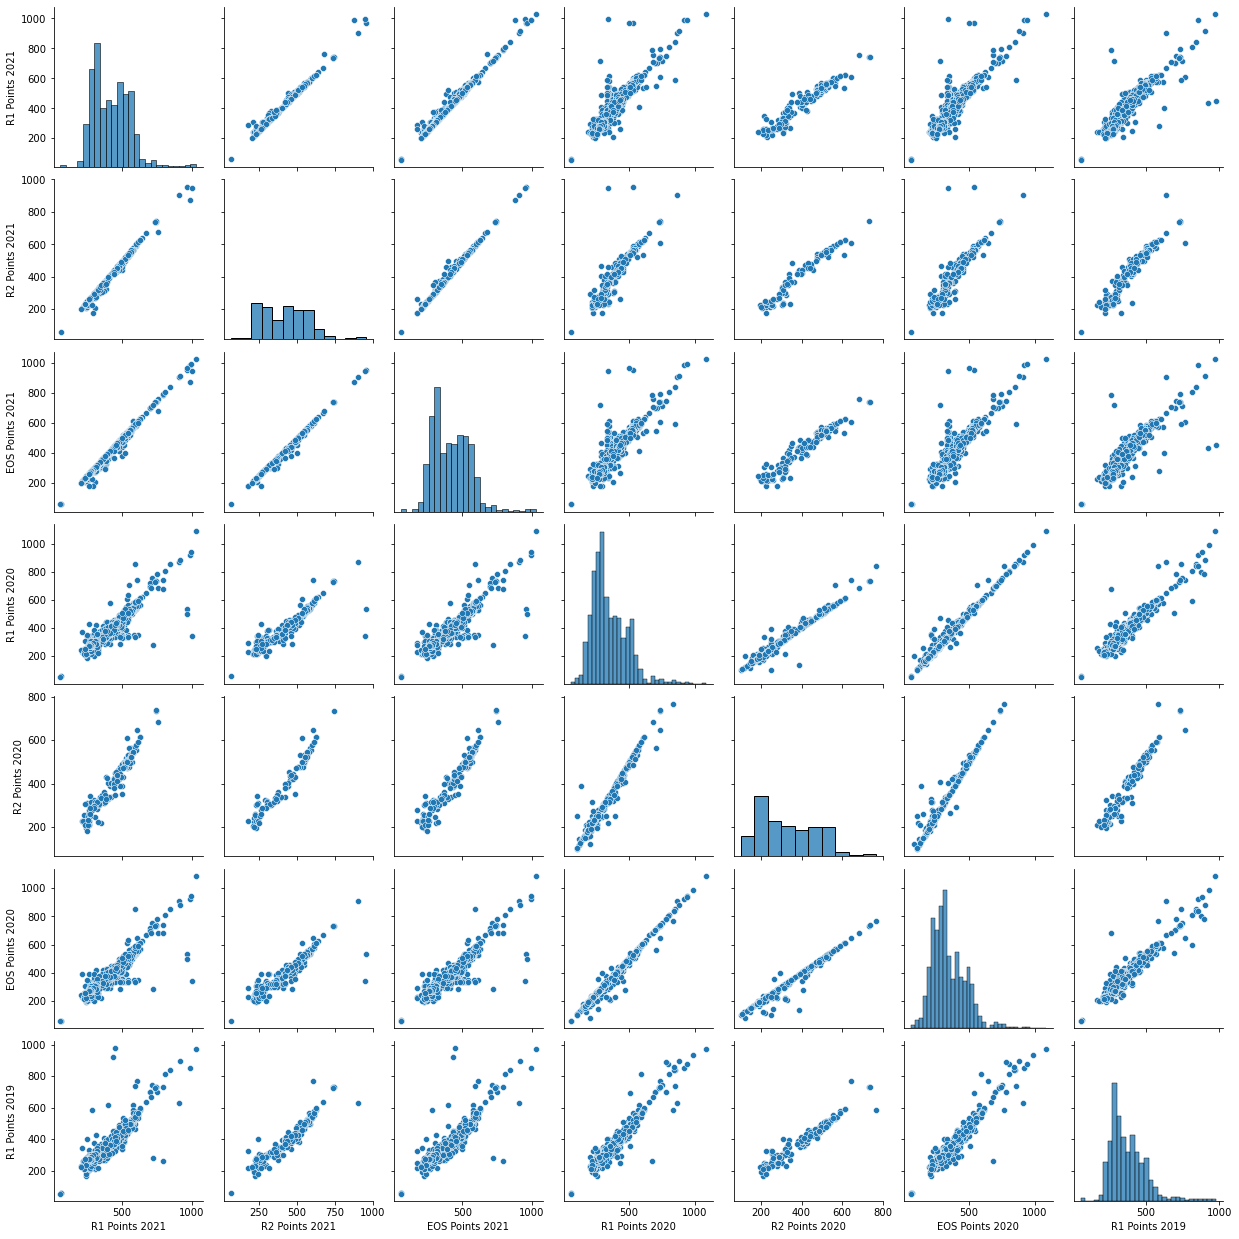

In [50]:
df = allcourses
sns.pairplot(df)

In [51]:
df.head()

,course,HEI,R1 Points 2021,R2 Points 2021,EOS Points 2021,R1 Points 2020,R2 Points 2020,EOS Points 2020,R1 Points 2019
code,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,Athlone Institute of Technology,300.0,NaN,300.0,303.0,NaN,303.0,304.0
AL802,Software Design in Artificial Intelligence for...,Athlone Institute of Technology,313.0,NaN,313.0,332.0,NaN,332.0,301.0
AL803,Software Design for Mobile Apps and Connected ...,Athlone Institute of Technology,350.0,NaN,350.0,337.0,NaN,337.0,309.0
AL805,Computer Engineering for Network Infrastructure,Athlone Institute of Technology,321.0,NaN,321.0,333.0,NaN,333.0,329.0
AL810,Quantity Surveying,Athlone Institute of Technology,328.0,NaN,328.0,319.0,NaN,326.0,307.0


### Plotting distribution
***
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset. KDE represents the data using a continuous probability density curve in one or more dimensions [12].

<AxesSubplot:title={'center':'Distribution of Round 1 Points 2019 - 2021'}, ylabel='Density'>

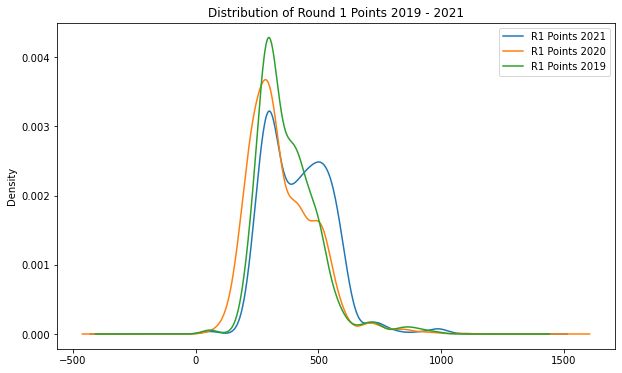

In [52]:
df['R1 Points 2021'].plot(kind='kde', 
                 figsize=(10,6), 
                 title='Distribution of Round 1 Points 2019 - 2021',
                         legend=True)

df['R1 Points 2020'].plot(kind='kde', 
                 figsize=(10,6),
                         legend=True)

df['R1 Points 2019'].plot(kind='kde', 
                 figsize=(10,6),
                         legend=True)

<AxesSubplot:title={'center':'Distribution of Round 2 Points 2019 - 2021'}, ylabel='Density'>

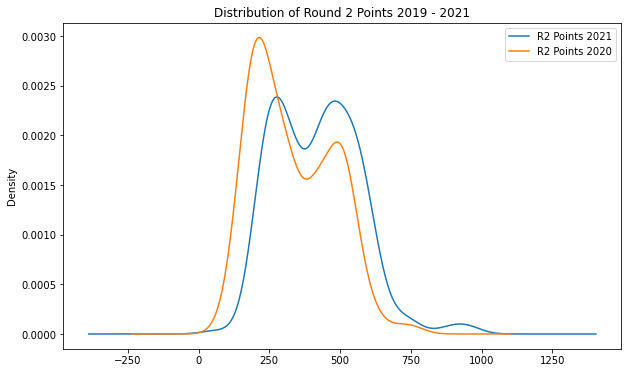

In [53]:
df['R2 Points 2021'].plot(kind='kde', 
                 figsize=(10,6), 
                 title='Distribution of Round 2 Points 2019 - 2021',
                         legend=True)

df['R2 Points 2020'].plot(kind='kde', 
                 figsize=(10,6),
                         legend=True)


<AxesSubplot:title={'center':'Distribution of EOS Points 2019 - 2021'}, ylabel='Density'>

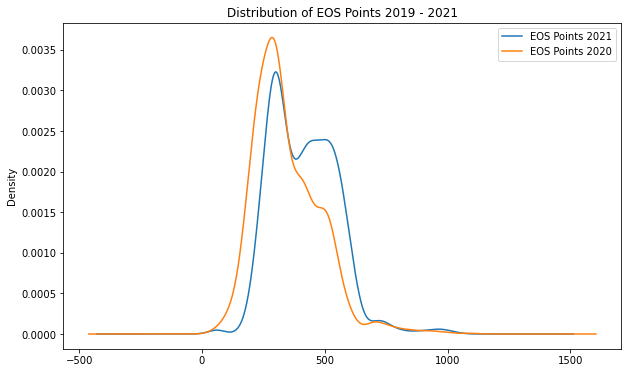

In [54]:
df['EOS Points 2021'].plot(kind='kde', 
                 figsize=(10,6), 
                 title='Distribution of EOS Points 2019 - 2021',
                         legend=True)

df['EOS Points 2020'].plot(kind='kde', 
                 figsize=(10,6),
                         legend=True)


### Bar Chart
A barplot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value [13].

<AxesSubplot:title={'center':'Average Round 1 Points 2021 per HEI'}, xlabel='HEI'>

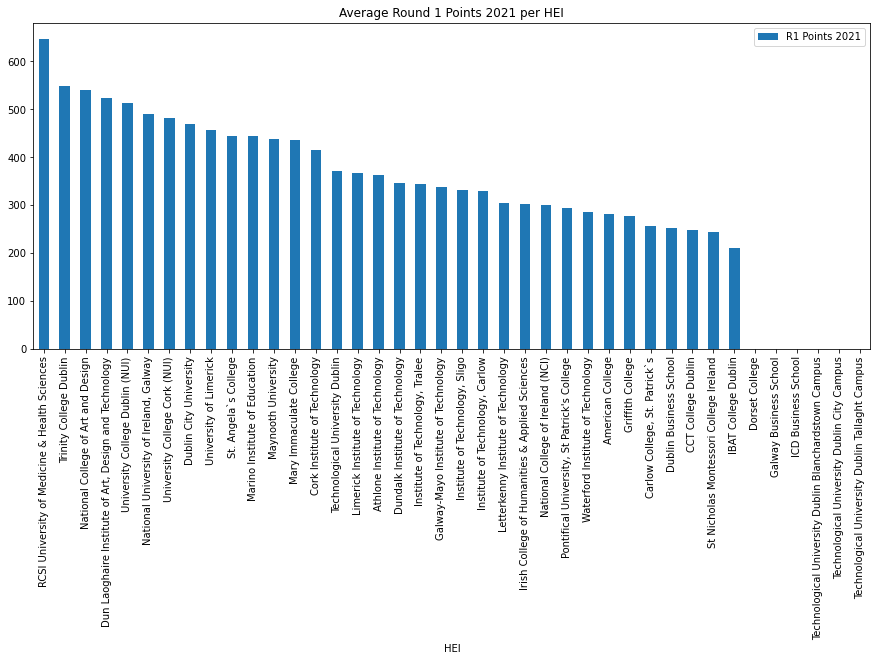

In [55]:
df[['HEI','R1 Points 2021']].groupby('HEI').mean().sort_values(by='R1 Points 2021', ascending=False).plot.bar(figsize=(15,6), rot=90, title='Average Round 1 Points 2021 per HEI')

<AxesSubplot:title={'center':'Average Round 2 Points 2021 per HEI'}, xlabel='HEI'>

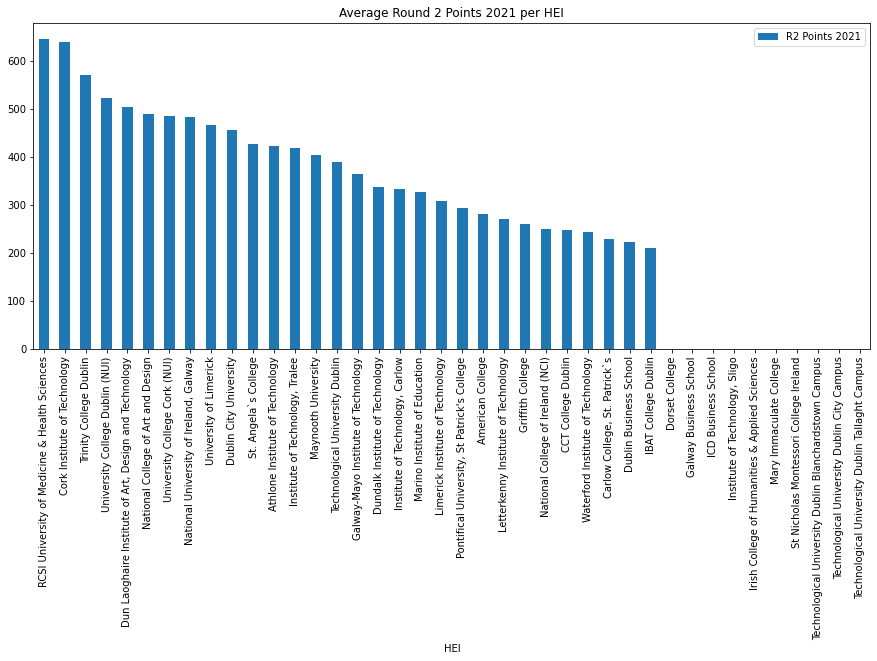

In [56]:
df[['HEI','R2 Points 2021']].groupby('HEI').mean().sort_values(by='R2 Points 2021', ascending=False).plot.bar(figsize=(15,6), rot=90, title='Average Round 2 Points 2021 per HEI')

<AxesSubplot:title={'center':'Average Round 1 Points per HEI'}, xlabel='HEI'>

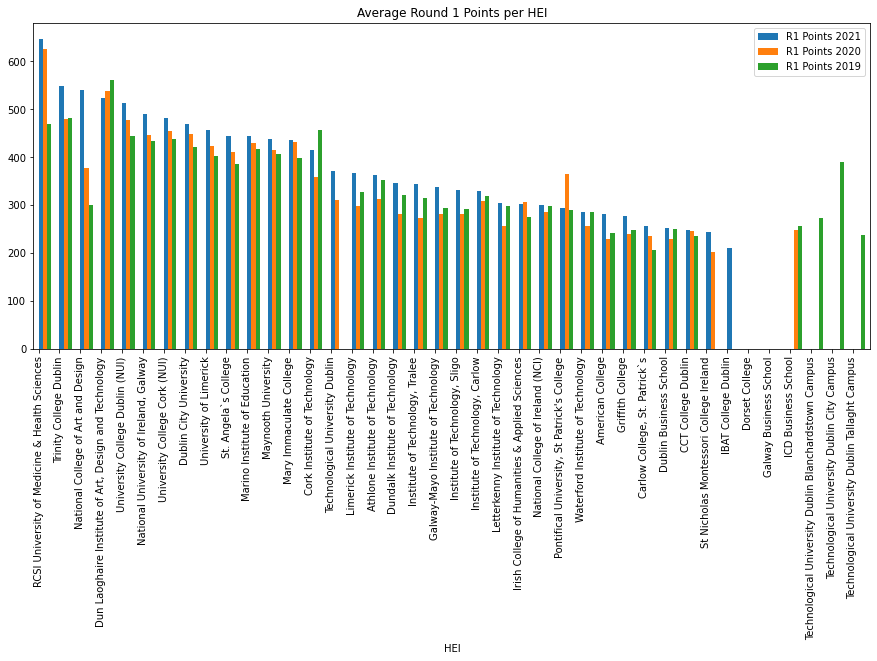

In [57]:
df[['HEI','R1 Points 2021', 'R1 Points 2020','R1 Points 2019']].groupby('HEI').mean().sort_values(by='R1 Points 2021', ascending=False).plot.bar(figsize=(15,6), rot=90, width=0.6, align='edge', title='Average Round 1 Points per HEI')

<AxesSubplot:title={'center':'Average Round 2 Points per HEI'}, xlabel='HEI'>

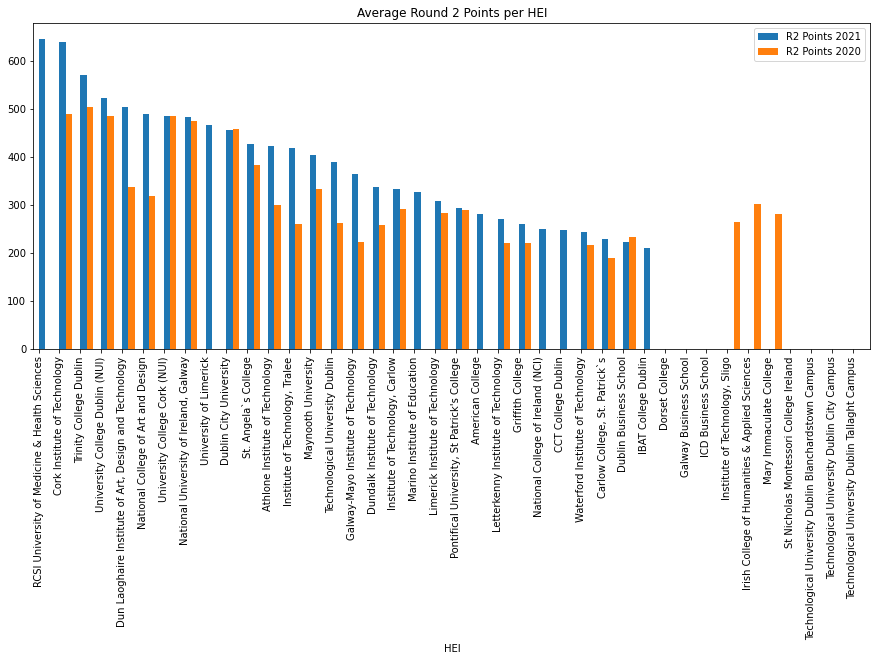

In [58]:
df[['HEI','R2 Points 2021', 'R2 Points 2020']].groupby('HEI').mean().sort_values(by='R2 Points 2021', ascending=False).plot.bar(figsize=(15,6), rot=90, width=0.6, align='edge', title='Average Round 2 Points per HEI')

<AxesSubplot:title={'center':'Average EOS Points per HEI'}, xlabel='HEI'>

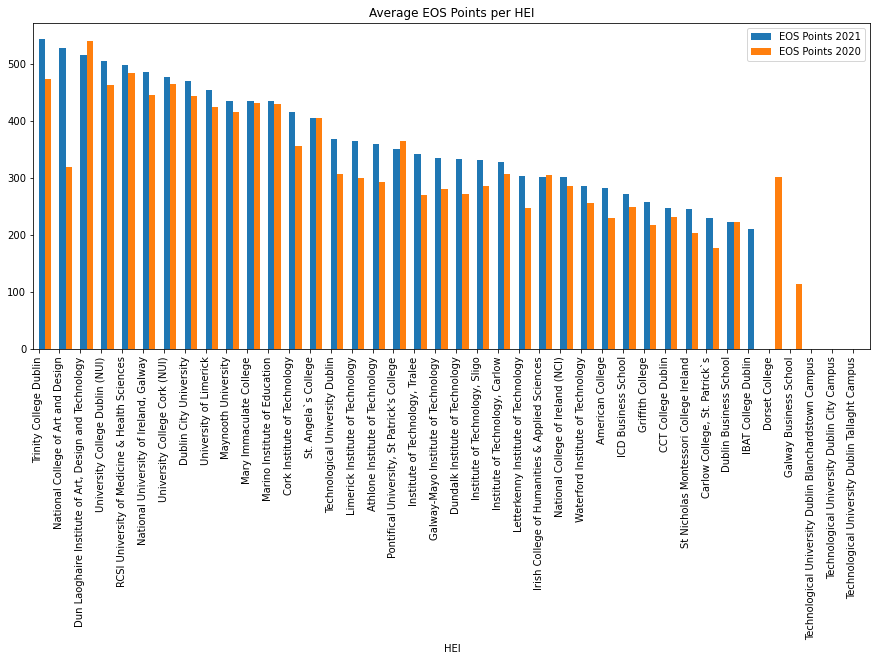

In [59]:
df[['HEI','EOS Points 2021', 'EOS Points 2020']].groupby('HEI').mean().sort_values(by='EOS Points 2021', ascending=False).plot.bar(figsize=(15,6), rot=90, width=0.6, align='edge', title='Average EOS Points per HEI')

### Boxplots
Boxplots can demonstrate the distribution of a variable. They show how values are spread out by means of quartiles and outliers. We can use the boxplot function of Pandas as follows [14].

<AxesSubplot:title={'center':'R1 Points 2021'}, xlabel='HEI'>

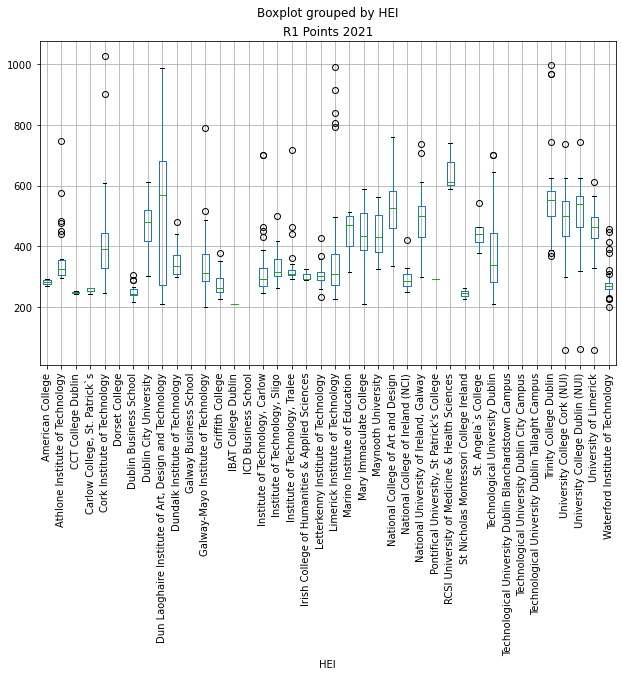

In [60]:
df.boxplot(column='R1 Points 2021', by='HEI', figsize=(10,6), rot=90)

***

## References
1. https://www.w3schools.com/python/python_regex.asp
2. https://www.w3schools.com/python/module_requests.asp
3. https://www.w3schools.com/python/python_datetime.asp
4. https://www.w3schools.com/python/pandas/pandas_intro.asp
5. https://www.geeksforgeeks.org/python-urllib-module/
6. http://www.cao.ie/index.php?page=points&p=2021
7 https://www.cao.ie/index.php?page=points&p=2020
8. http://www2.cao.ie/points/lvl8_19.pdf%5D
9. https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
10. https://stackoverflow.com/questions/42135409/removing-a-character-from-entire-data-frame
11. https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
12. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
13. https://www.python-graph-gallery.com/barplot/
14. https://towardsdatascience.com/data-visualization-with-pandas-1571bbc541c8

